### Dimension Reduction Task01

- 기대 수명 데이터세트를 회귀 분석하되, 차원을 축소하여 진행해본다.

In [1]:
import pandas as pd

l_df = pd.read_csv('./datasets/life_expectancy.csv')
l_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [2]:
# feature 특성확인
l_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [3]:
# 불필요 컬럼 삭제
pre_l_df = l_df.drop(labels = ['Country','Year','Status'], axis =1 ).reset_index(drop=True)
pre_l_df

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
pre_l_df['Life expectancy ']

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64

In [5]:
# target data 분리 및 맨 뒤쪽 위치
target_column = pre_l_df.pop('Life expectancy ')

# 'target' 열을 데이터프레임의 맨 뒤에 추가
pre_l_df['Life expectancy'] = target_column
pre_l_df

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3


In [6]:
# 결측치 확인
pre_l_df.isna().sum()

Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Life expectancy                     10
dtype: int64

In [7]:
pre_l_df.columns

Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Life expectancy'],
      dtype='object')

In [8]:
# 결측지 제거
columns = ['Life expectancy','Adult Mortality','Alcohol','Hepatitis B',' BMI ','Polio','Total expenditure',
          'Diphtheria ','GDP','Population',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources',
           'Schooling']

for column in columns:
    pre_l_df = pre_l_df[~pre_l_df[column].isna()]

pre_l_df = pre_l_df.reset_index(drop=True)

In [9]:
pre_l_df.isna().sum()

Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Life expectancy                    0
dtype: int64

In [10]:
# 결측치 확인
pre_l_df.duplicated().sum()

0

In [11]:
# 이상치 삭제 진행을 위한 정규화 작업
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(pre_l_df)
std_pre_l_df = pd.DataFrame(result, columns=pre_l_df.columns)
std_pre_l_df

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,0.756629,0.243745,-1.122948,-0.356909,-0.555446,-0.106171,-0.963560,0.238134,-3.455955,0.958840,-0.887941,-0.312389,-0.434239,0.270913,2.685909,2.663654,-0.833462,-0.722799,-0.489223
1,0.820490,0.260300,-1.122948,-0.355633,-0.672648,-0.171828,-0.988878,0.256557,-1.139051,0.967541,-1.027006,-0.312389,-0.431760,-0.203382,2.751157,2.706643,-0.849853,-0.758583,-1.069152
2,0.796542,0.276854,-1.122948,-0.355806,-0.594514,-0.177977,-1.014197,0.274979,-0.960828,0.945790,-0.934296,-0.312389,-0.430100,0.242452,2.794656,2.749632,-0.882634,-0.794367,-1.069152
3,0.828472,0.301687,-1.122948,-0.352983,-0.477312,0.055789,-1.039516,0.299541,-0.738049,1.115452,-0.795231,-0.312389,-0.426769,-0.155548,2.838155,2.814116,-0.920878,-0.830151,-1.114637
4,0.852420,0.318242,-1.122948,-0.393403,-0.438245,0.078203,-1.059771,0.324104,-0.693493,0.832682,-0.748876,-0.312389,-0.479628,-0.165747,2.903403,2.857105,-0.970049,-0.937503,-1.148751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,4.428626,-0.045965,-0.042998,-0.397439,-0.438245,-0.217549,-0.558461,-0.013633,-0.738049,0.510759,-0.887941,5.242678,-0.445561,-0.026635,0.989458,0.965586,-1.226833,-1.044856,-2.843056
1645,4.364766,-0.054242,-0.117478,-0.397439,-2.821346,-0.121643,-0.578715,-0.019774,-3.411399,0.245390,-0.748876,5.756729,-0.445650,-0.028673,1.076455,1.073058,-1.166735,-0.937503,-2.820313
1646,-0.760066,-0.062520,-0.025620,-0.397439,-0.242909,-0.190473,-0.598970,-0.025914,-0.470714,0.249740,-0.609811,6.270780,-0.480168,-0.206251,-0.793991,-0.775472,-1.117564,-0.758583,-2.786200
1647,4.133270,-0.062520,-0.698416,-0.397439,-0.125707,-0.168158,-0.619225,-0.032055,-0.337046,0.088779,-0.424391,6.652173,-0.437348,-0.032474,-0.706993,-0.689494,-1.117564,-0.830151,-2.729344


In [12]:
# 이상치 제거
condition = True
error_count = []

for column in std_pre_l_df.columns:
    if std_pre_l_df[column].between(-1.96, 1.96) is True:
        error_count.append(std_pre_l_df[column].between(-1.96, 1.96).count())
    condition &= std_pre_l_df[column].between(-1.96, 1.96)

std_pre_l_df = std_pre_l_df[condition]
std_pre_l_df

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
16,-0.752083,-0.269455,0.016585,-0.189913,0.772839,-0.220624,1.006234,-0.271541,0.687738,0.019174,0.688128,-0.312389,-0.140494,-0.207623,-0.793991,-0.775472,0.712705,0.744348,0.966288
17,-1.278935,-0.269455,-0.005759,-0.153650,0.733772,-0.220624,0.965724,-0.265401,0.643182,-0.033030,0.641774,-0.312389,-0.086317,-0.203931,-0.793991,-0.775472,0.707242,0.744348,0.932174
18,-0.672257,-0.269455,0.056307,-0.152441,0.772839,-0.220624,0.930278,-0.265401,0.687738,-0.128736,0.688128,-0.312389,-0.100354,-0.203922,-0.772241,-0.753977,0.696315,0.744348,0.898061
19,-0.656292,-0.269455,0.150648,-0.162922,0.772839,-0.219731,0.894832,-0.265401,0.687738,-0.159189,0.688128,-0.312389,-0.114921,-0.207991,-0.772241,-0.753977,0.658071,0.744348,0.863947
20,-0.640327,-0.269455,0.207748,-0.148924,0.772839,-0.217847,0.859386,-0.265401,0.687738,-0.106985,0.688128,-0.312389,-0.098397,-0.203842,-0.750492,-0.732483,0.581582,0.422291,0.829834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,1.275498,-0.029410,-0.527114,-0.385712,-0.008505,-0.217153,-0.801520,-0.013633,-0.426158,-0.420207,-0.238971,0.466979,-0.468972,-0.186520,0.336977,0.277760,-0.363602,0.136019,-0.716646
1627,1.578837,-0.029410,-0.487391,-0.293358,0.069629,1.091916,-0.857221,-0.001352,-0.025156,-0.737779,-0.146261,0.715713,-0.341812,-0.005521,0.380476,0.320750,-0.483799,-0.042902,-1.262462
1629,1.594802,-0.021133,-0.554423,-0.315634,0.577503,-0.218045,-1.819331,0.017070,0.420403,-0.533315,0.456354,1.180017,-0.385875,-0.016996,0.402225,0.363739,-0.620386,-0.186038,-1.353432
1634,1.618750,-0.079075,0.488287,-0.391285,0.460302,-0.220624,-0.345784,-0.062758,0.375847,0.210588,0.317289,0.715713,-0.474055,0.010762,0.228230,0.170288,-0.729656,-0.651231,-1.148751


In [13]:
# 이상치 제거한 데이터를 인덱스 번호에 맞게 가져오기
pre_l_df = pre_l_df.iloc[std_pre_l_df.index].reset_index(drop=True)
pre_l_df

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,74.0,0,4.60,364.975229,99.0,0,58.0,0,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
1,8.0,0,4.51,428.749067,98.0,0,57.2,1,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,77.5
2,84.0,0,4.76,430.876979,99.0,0,56.5,1,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2,77.2
3,86.0,0,5.14,412.443356,99.0,9,55.8,1,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2,76.9
4,88.0,0,5.37,437.062100,99.0,28,55.1,1,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3,76.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,328.0,29,2.41,20.623063,79.0,35,22.3,42,74.0,4.99,79.0,4.8,185.793359,1515321.0,6.4,6.2,0.565,12.5,63.0
959,366.0,29,2.57,183.046169,81.0,13234,21.2,44,83.0,4.26,81.0,6.3,1644.619672,14264756.0,6.6,6.4,0.543,12.0,58.2
960,368.0,30,2.30,143.869887,94.0,26,2.2,47,93.0,4.73,94.0,9.1,1139.112330,13456417.0,6.7,6.6,0.518,11.6,57.4
961,371.0,23,6.50,10.822595,91.0,0,31.3,34,92.0,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3,59.2


<Axes: >

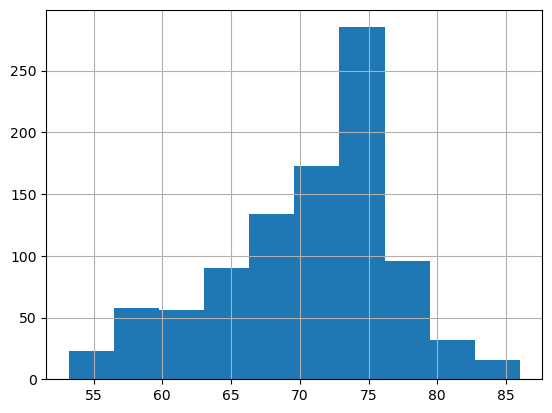

In [14]:
# 타겟 데이터 히스토그램 확인
pre_l_df['Life expectancy'].hist()

# import numpy as np 
# np.log1p(pre_l_df['Life expectancy']).hist()

In [15]:
# 선형 모델 분석
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_l_df.iloc[:, :-1], pre_l_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [16]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))
    # print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
    #       .format(MSE, RMSE, R2))

In [17]:
# 높은 수치를 보여주고 있음
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 6.2171, RMSE: 2.4934, MSLE: 0.0012, RMSLE: 0.0348, R2: 0.8146


# PDA

In [30]:
# 차원 축소 진행
train_df = pd.concat([X_train, y_train], axis = 1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis = 1).reset_index(drop=True)

In [36]:
# 차원 축소 진행
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)

pca_train = pca.fit_transform(train_df.iloc[:, :-1])
pca_test = pca.fit_transform(test_df.iloc[:, :-1])


In [37]:
print(pca_train.shape, pca_test.shape)

(770, 2) (193, 2)


In [40]:
pca_columns = [f'pca{i+1}' for i in range(pca_train.shape[1])]
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:,'target'] = train_df['Life expectancy']

pca_columns = [f'pca{i+1}' for i in range(pca_test.shape[1])]
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
pca_test_df.loc[:,'target'] = test_df['Life expectancy']



In [41]:
display(pca_train_df)
display(pca_test_df)

,pca1,pca2,target
0,-7.816444e+06,-952.117674,71.6
1,-7.641265e+06,185.861130,68.5
2,1.891095e+05,-1347.742734,74.3
3,-8.453725e+06,-3098.386771,73.0
4,-8.121135e+06,-2384.387743,61.4
...,...,...,...
765,1.310565e+07,-633.391882,71.1
766,-7.920748e+06,6075.631541,71.4
767,-3.212160e+06,4091.209057,59.2
768,-7.651504e+06,-3380.239951,71.1


,pca1,pca2,target
0,-1.860501e+06,-3850.306159,71.0
1,-1.900064e+05,-2091.204503,73.6
2,-7.759007e+06,-79.679603,73.0
3,-7.150788e+06,1690.171076,71.8
4,-8.327831e+06,11103.435831,86.0
...,...,...,...
188,-5.502862e+06,-338.413413,74.4
189,-7.529138e+06,-1819.339595,74.1
190,6.062778e+06,206.184797,74.6
191,-7.938015e+06,-3282.065112,66.8


In [42]:
# 보존률
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[9.99999913e-01 7.54609849e-08]
0.9999999882809912


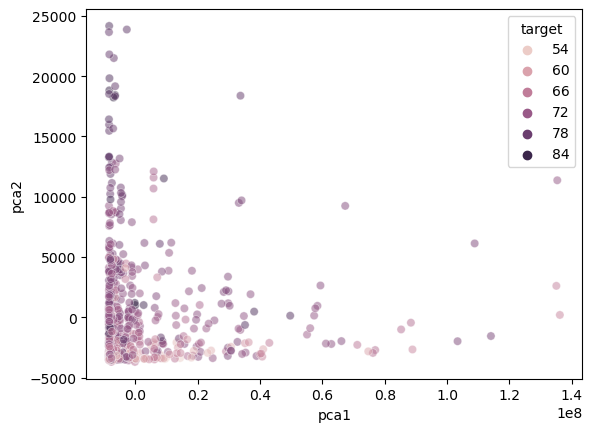

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='pca1', y='pca2', hue='target', data=pca_train_df, alpha = 0.5)
plt.show()

In [55]:
# 차원 높이기
from sklearn.decomposition import PCA

pca = PCA(n_components= 5)

pca_train = pca.fit_transform(train_df.iloc[:, :-1])
pca_test = pca.fit_transform(test_df.iloc[:, :-1])



(770, 3) (193, 3)


In [56]:
pca_columns = [f'pca{i+1}' for i in range(pca_train.shape[1])]
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:,'target'] = train_df['Life expectancy']

pca_columns = [f'pca{i+1}' for i in range(pca_test.shape[1])]
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
pca_test_df.loc[:,'target'] = test_df['Life expectancy']



In [60]:
# 보존률 (설명률)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[9.99999913e-01 7.54609849e-08 1.15154449e-08 1.82210156e-10
 1.85968028e-11]
0.9999999999972431


In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
import sklearn

features, targets = pca_train_df.iloc[:,:-1], pca_train_df.iloc[:, -1]
parameters = {
    'max_depth' : [5, 10, 20],
    'min_samples_split': [10, 50, 100]
}

rfc = RandomForestRegressor()


kfold = KFold(n_splits=15, random_state=321, shuffle=True)

g_rfc = GridSearchCV(rfc, param_grid=parameters, cv=kfold, return_train_score=True, scoring='r2')
g_rfc.fit(features, targets)


GridSearchCV(cv=KFold(n_splits=15, random_state=321, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='r2')

In [69]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
result_df

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 10}",0.748546,3
1,"{'max_depth': 5, 'min_samples_split': 50}",0.666676,6
2,"{'max_depth': 5, 'min_samples_split': 100}",0.602341,9
3,"{'max_depth': 10, 'min_samples_split': 10}",0.789071,1
4,"{'max_depth': 10, 'min_samples_split': 50}",0.694449,5
5,"{'max_depth': 10, 'min_samples_split': 100}",0.617098,8
6,"{'max_depth': 20, 'min_samples_split': 10}",0.788241,2
7,"{'max_depth': 20, 'min_samples_split': 50}",0.695180,4
8,"{'max_depth': 20, 'min_samples_split': 100}",0.620950,7


In [72]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))
    # print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
    #       .format(MSE, RMSE, R2))

In [73]:
X_test, y_test = pca_test_df.iloc[:, :-1], pca_test_df.iloc[:, -1]

rfc = g_rfc.best_estimator_
prediction = rfc.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 17.8837, RMSE: 4.2289, MSLE: 0.0038, RMSLE: 0.0614, R2: 0.4666


In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = pca_train_df.iloc[:,:-1], pca_train_df.iloc[:, -1]

X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=321)

dt_r = DecisionTreeRegressor(random_state=321)
rd_r = RandomForestRegressor(random_state=321)
gb_r = GradientBoostingRegressor(random_state=321)
xgb_r = XGBRegressor(random_state=321)
lgb_r = LGBMRegressor(random_state=321)

models = [dt_r, rd_r, gb_r, xgb_r, lgb_r]

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 13.1640, RMSE: 3.6282, MSLE: 0.0028, RMSLE: 0.0531, R2: 0.6942
RandomForestRegressor
MSE: 10.3959, RMSE: 3.2243, MSLE: 0.0022, RMSLE: 0.0473, R2: 0.7585
GradientBoostingRegressor
MSE: 12.1206, RMSE: 3.4815, MSLE: 0.0025, RMSLE: 0.0503, R2: 0.7185
XGBRegressor
MSE: 13.1374, RMSE: 3.6246, MSLE: 0.0028, RMSLE: 0.0526, R2: 0.6948
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1029
[LightGBM] [Info] Number of data points in the train set: 616, number of used features: 5
[LightGBM] [Info] Start training from score 70.749026
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

In [ ]:
import pickle
import joblib

liblikjb.dump(pipe, 'life.pkl')

In [ ]:
joblib.load('./life')